# Assignment 6: Weather in Knock Airport
Author: Zoe McNamara Harlowe

### Part 1 (60%)

*Based on the dataset of Knock Airport Climate Data, plot:*

- *The temperature*
- *The mean temperature each day*
- *The mean temperature for each month*

In [1]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Filename & Data Directory
filename = "knock_weather.csv"
datadir = r"C:\Users\ZMH\OneDrive\Desktop\PFDA\data\\" # still can't get "../../data" working
fullpath = datadir + filename

# Read in CSV file
df = pd.read_csv(fullpath, skiprows=23)

print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


C:\Users\ZMH\AppData\Local\Temp\ipykernel_38544\403217251.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fullpath, skiprows=23)


Cast df['date'] into a datetime object for resampling (Found this on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [4]:
print(df.index)

DatetimeIndex(['1996-04-10 14:00:00', '1996-07-31 08:00:00',
               '1996-07-31 09:00:00', '1996-07-31 10:00:00',
               '1996-07-31 11:00:00', '1996-07-31 12:00:00',
               '1996-07-31 13:00:00', '1996-07-31 14:00:00',
               '1996-07-31 15:00:00', '1996-07-31 16:00:00',
               ...
               '2025-10-31 15:00:00', '2025-10-31 16:00:00',
               '2025-10-31 17:00:00', '2025-10-31 18:00:00',
               '2025-10-31 19:00:00', '2025-10-31 20:00:00',
               '2025-10-31 21:00:00', '2025-10-31 22:00:00',
               '2025-10-31 23:00:00', '2025-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=256434, freq=None)


In [5]:
temp = df.iloc[:,3]
temp.head()

date
1996-04-10 14:00:00    11.5
1996-07-31 08:00:00    11.5
1996-07-31 09:00:00    11.6
1996-07-31 10:00:00    12.9
1996-07-31 11:00:00    14.5
Name: temp, dtype: float64

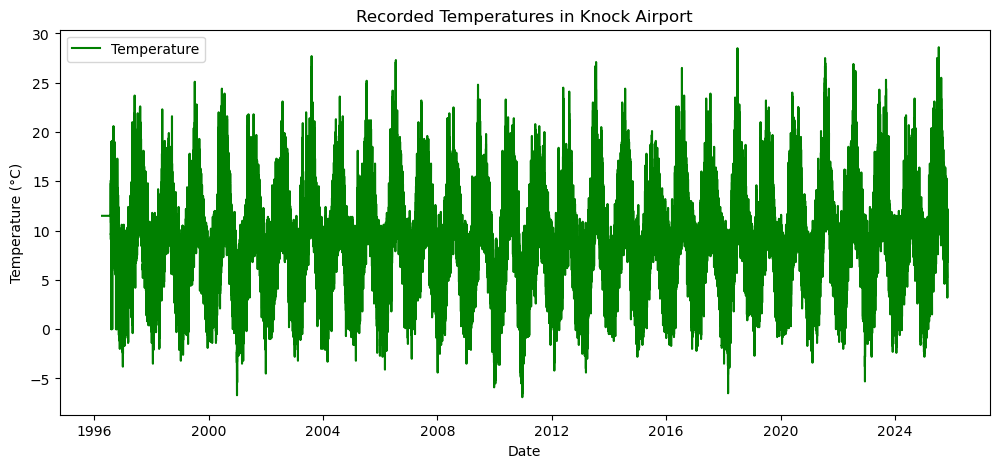

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df.index, temp, label='Temperature', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Recorded Temperatures in Knock Airport')
plt.legend()
plt.show()
plt.savefig("temp_knock_weather.png")

In [7]:
# Find daily average temp
daily_avg = df["temp"].resample("D").mean()

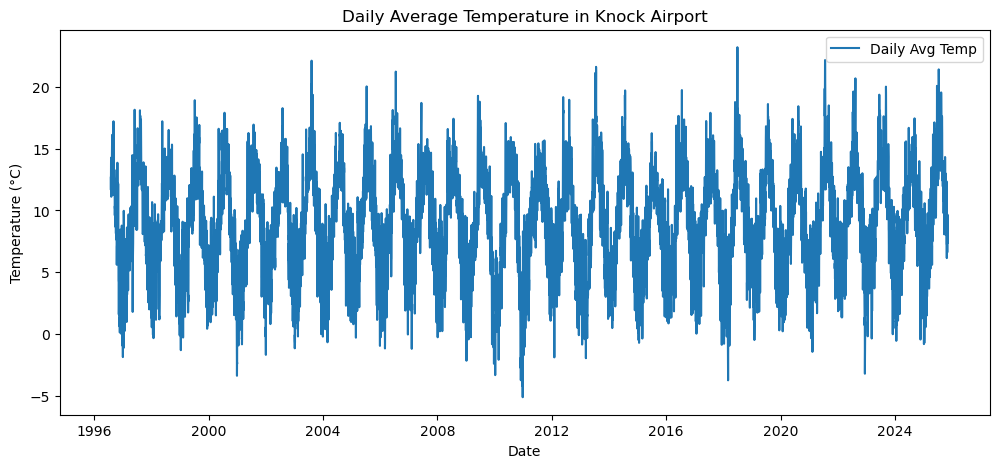

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot daily mean temperature
plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg, label='Daily Avg Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Knock Airport')
plt.legend()
plt.show()
plt.savefig("daily_temp_knock_weather.png")


In [9]:
# Find monthly average temp
monthly_avg = df["temp"].resample("MS").mean()

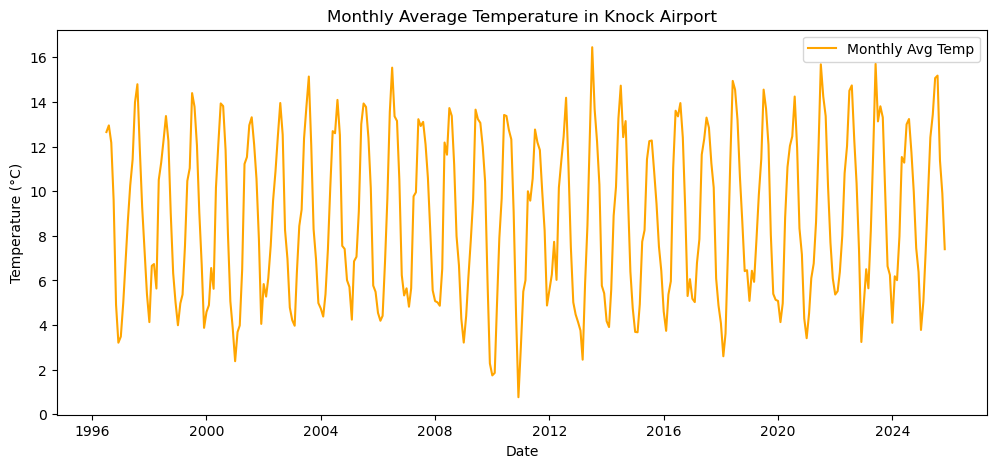

<Figure size 640x480 with 0 Axes>

In [10]:
# Plot monthly mean temperature
plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg, label='Monthly Avg Temp', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature in Knock Airport')
plt.legend()
plt.show()
plt.savefig("monthly_temp_knock_weather.png")

### Part 2 (40%)

*Plot:*

- *The Windspeed (there is data missing from this column)*
- *The rolling windspeed (say over 24 hours)*
- *The max windspeed for each day*
- *The monthly mean of the daily max windspeeds*

The first 18 values in the windspeed column are 0 (from April '96 to July '96). I decided to drop all of these columns and begin from August 1996.

In [11]:
# Check first 20 values for windspeed
df['wdsp'].iloc[0:20]

date
1996-04-10 14:00:00    0
1996-07-31 08:00:00    0
1996-07-31 09:00:00    0
1996-07-31 10:00:00    0
1996-07-31 11:00:00    0
1996-07-31 12:00:00    0
1996-07-31 13:00:00    0
1996-07-31 14:00:00    0
1996-07-31 15:00:00    0
1996-07-31 16:00:00    0
1996-07-31 17:00:00    0
1996-07-31 18:00:00    0
1996-07-31 19:00:00    0
1996-07-31 20:00:00    0
1996-07-31 21:00:00    0
1996-07-31 22:00:00    0
1996-07-31 23:00:00    0
1996-08-01 00:00:00    0
1996-08-01 01:00:00    6
1996-08-01 02:00:00    8
Name: wdsp, dtype: object

In [12]:
# Check what type the 0s are 
type(df['wdsp'].iloc[1])

str

In [13]:
# Drop all rows with 0 in them
df = df[df['wdsp'] != '0']

# Drop all other columns
columns_to_drop = ['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt']

df.drop(columns = columns_to_drop, inplace = True)

In [ ]:
# Change wdsp column values to string
df['wdsp'] = df['wdsp'].astype('str')

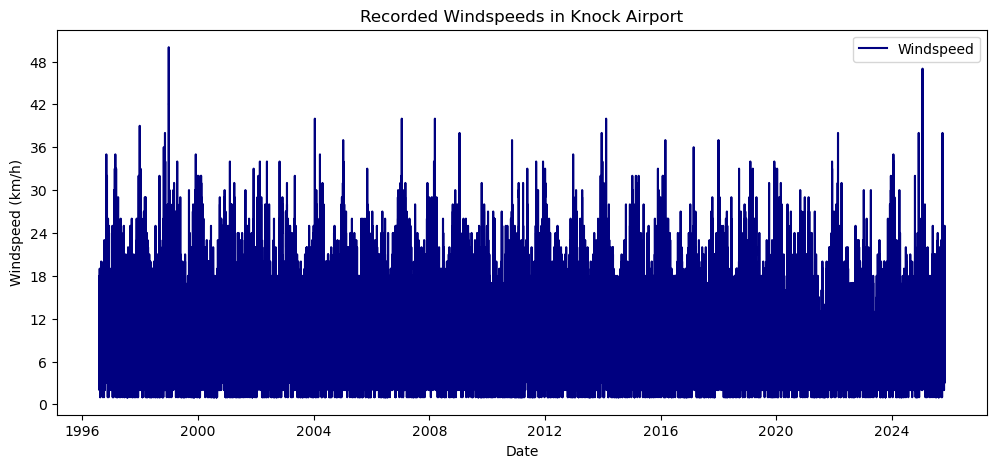

<Figure size 640x480 with 0 Axes>

In [72]:
wdsp = df.iloc[:,0]

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, wdsp, label='Windspeed', color='navy')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.yticks(np.arange(0, 52, step=6))
plt.title('Recorded Windspeeds in Knock Airport')
plt.legend()
plt.show()
plt.savefig("wdsp_knock_weather.png")

Now to find the rolling windspeed. (See Pandas rolling() documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

In [ ]:
# Clean the data again as I was getting errors
df['wdsp'] = df['wdsp'].replace(r'^\s*$', None, regex=True)
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [ ]:
# Calculate rolling avg over 24hrs
df['wdsp_rolling_24'] = df['wdsp'].rolling(window=24).mean()

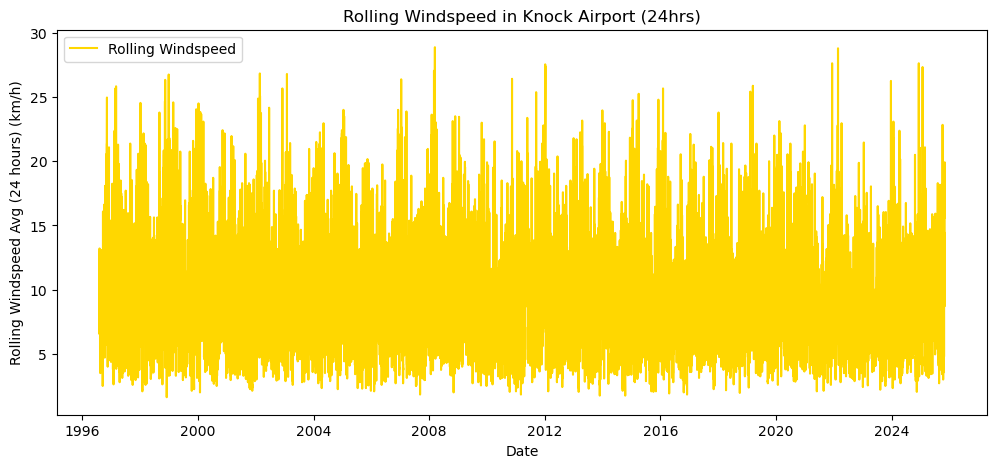

<Figure size 640x480 with 0 Axes>

In [71]:
# Plot the data
plt.figure(figsize=(12,5))
plt.plot(df.index, df['wdsp_rolling_24'], label='Rolling Windspeed', color='gold')
plt.xlabel('Date')
plt.ylabel('Rolling Windspeed Avg (24 hours) (km/h)')
plt.title('Rolling Windspeed in Knock Airport (24hrs)')
plt.legend()
plt.show()
plt.savefig("rolling_wdsp_knock_weather.png")

Max windspeed for each day

In [57]:
# Resample to get daily max
daily_max = df['wdsp'].resample('D').max()

daily_max

date
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
1996-08-04    18.0
1996-08-05    14.0
              ... 
2025-10-28    15.0
2025-10-29    15.0
2025-10-30    25.0
2025-10-31    20.0
2025-11-01     7.0
Freq: D, Name: wdsp, Length: 10685, dtype: float64

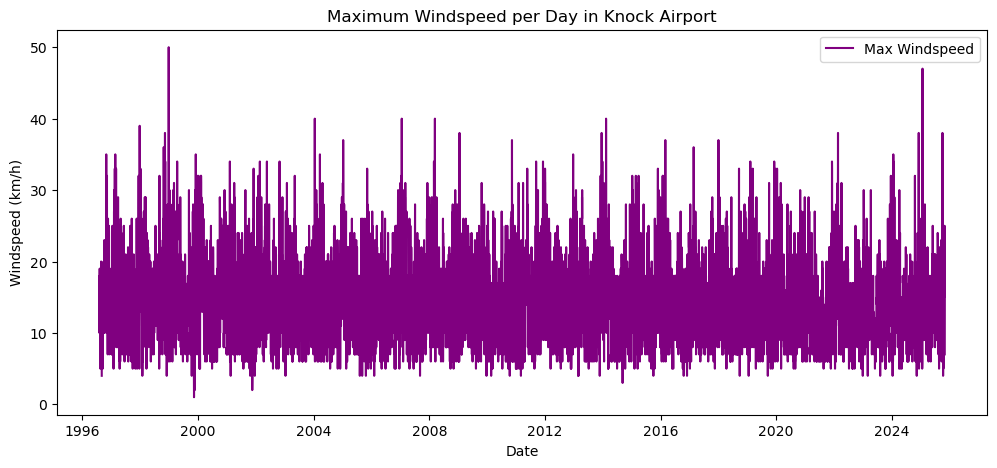

<Figure size 640x480 with 0 Axes>

In [70]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_max.index, daily_max, label='Max Windspeed', color='purple')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.title('Maximum Windspeed per Day in Knock Airport')
plt.legend()
plt.show()
plt.savefig("daily_max_wdsp_knock_weather.png")

Monthly mean of daily max windspeeds

In [65]:
# Resample again
monthly_mean_daily_max = daily_max.resample("MS").mean()

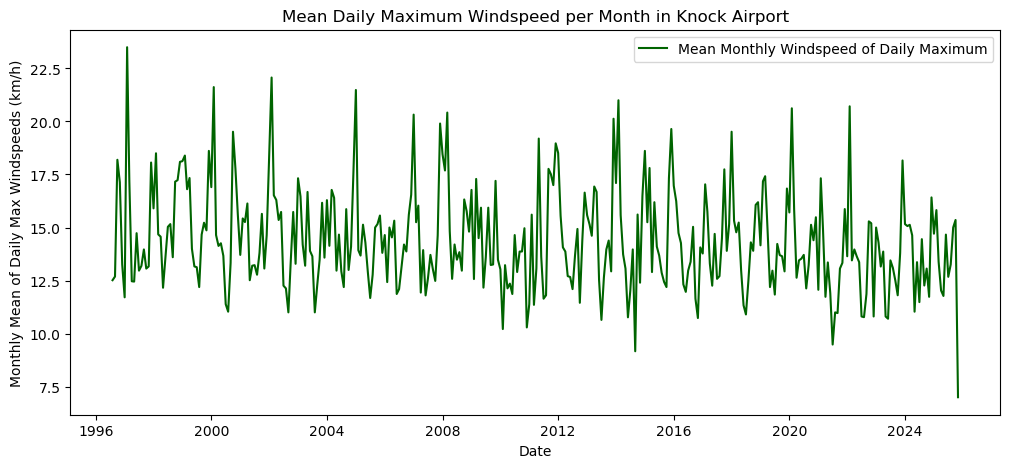

<Figure size 640x480 with 0 Axes>

In [69]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_mean_daily_max.index, monthly_mean_daily_max, label='Mean Monthly Windspeed of Daily Maximum', color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Monthly Mean of Daily Max Windspeeds (km/h)')
plt.title('Mean Daily Maximum Windspeed per Month in Knock Airport')
plt.legend()
plt.show()
plt.savefig("mean_monthly_daily_max_wdsp_knock_weather.png")

## End